In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 170)

In [4]:
df_train = pd.read_csv("data/train.csv")
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df_train.loc[df_train["sc_w"] == 0, "sc_w"].count()

180

In [7]:
df_train.shape

(2000, 21)

In [11]:
df_train.loc[(df_train["wifi"] == 0) & (df_train["price_range"] == 3) & (df_train["blue"] == 0)].count()

battery_power    116
blue             116
clock_speed      116
dual_sim         116
fc               116
four_g           116
int_memory       116
m_dep            116
mobile_wt        116
n_cores          116
pc               116
px_height        116
px_width         116
ram              116
sc_h             116
sc_w             116
talk_time        116
three_g          116
touch_screen     116
wifi             116
price_range      116
dtype: int64

In [13]:
df_train["ratio_durability"] = df_train["battery_power"] / df_train["talk_time"]
df_train["px"] = df_train["px_height"] * df_train["px_width"]
df_train["ram_core"] = df_train["ram"] * df_train["n_cores"]
df_train["sc_area"] = df_train["sc_h"] * df_train["sc_w"]

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   battery_power     2000 non-null   int64  
 1   blue              2000 non-null   int64  
 2   clock_speed       2000 non-null   float64
 3   dual_sim          2000 non-null   int64  
 4   fc                2000 non-null   int64  
 5   four_g            2000 non-null   int64  
 6   int_memory        2000 non-null   int64  
 7   m_dep             2000 non-null   float64
 8   mobile_wt         2000 non-null   int64  
 9   n_cores           2000 non-null   int64  
 10  pc                2000 non-null   int64  
 11  px_height         2000 non-null   int64  
 12  px_width          2000 non-null   int64  
 13  ram               2000 non-null   int64  
 14  sc_h              2000 non-null   int64  
 15  sc_w              2000 non-null   int64  
 16  talk_time         2000 non-null   int64  


In [128]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [15]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,ratio_durability,px,ram_core,sc_area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,44.315789,15120,5098,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,145.857143,1799140,7893,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,62.555556,2167308,13015,22
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,55.909091,2171776,16614,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,121.400000,1464096,2822,16


In [16]:
df_o = pd.read_csv("data/df_outlired.csv")
df_o.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [18]:
df_o["ratio_durability"] = df_o["battery_power"] / df_o["talk_time"]
df_o["px"] = df_o["px_height"] * df_o["px_width"]
df_o["ram_core"] = df_o["ram"] * df_o["n_cores"]
df_o["sc_area"] = df_o["sc_h"] * df_o["sc_w"]

In [19]:
df_o.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,ratio_durability,px,ram_core,sc_area
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,44.315789,15120,5098,63
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,145.857143,1799140,7893,51
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,62.555556,2167308,13015,22
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,55.909091,2171776,16614,128
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,121.400000,1464096,2822,16


In [110]:
y = df_o["price_range"]
X = df_o.drop(["price_range"], axis = 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15, random_state=42)

# Models
GB = GradientBoostingClassifier()
XG = XGBClassifier(use_label_encoder = False)
LG = LGBMClassifier(max_depth = 5)

In [23]:
# Gradient Boosting Model
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
print("accuracy : " , accuracy_score(y_test, y_pred))

accuracy :  0.9225589225589226


In [24]:
# XGBoost
XG.fit(X_train, y_train)
y_pred = XG.predict(X_test)
print("accuracy : " , accuracy_score(y_test, y_pred))

accuracy :  0.9191919191919192


In [25]:
# LGBM
LG.fit(X_train, y_train)
y_pred = LG.predict(X_test)
print("accuracy : " , accuracy_score(y_test, y_pred))

accuracy :  0.9259259259259259


In [36]:
cat = CatBoostClassifier(verbose = False)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
print("accuracy : " , accuracy_score(y_test, y_pred))

accuracy :  0.9494949494949495


In [105]:
cat = CatBoostClassifier(depth= 7, iterations= 300, learning_rate= 0.1, verbose = False)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
print("accuracy : " , accuracy_score(y_test, y_pred))

accuracy :  0.9562289562289562


In [40]:
# Adaboost
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print("accuracy : " , accuracy_score(y_test, y_pred))

accuracy :  0.7239057239057239


In [42]:
# Random Forest
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
print("accuracy : " , accuracy_score(y_test, y_pred))

accuracy :  0.8855218855218855


In [45]:
# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print("accuracy : " , accuracy_score(y_test, y_pred))

accuracy :  0.8585858585858586


In [49]:
def base_models(X, y, scoring="accuracy"):
    print("Base Models....")
    classifiers = [
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=5, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

base_models(X, y)

Base Models....
accuracy: 0.9005 (GBM) 
accuracy: 0.9131 (XGBoost) 
accuracy: 0.9136 (LightGBM) 
accuracy: 0.9394 (CatBoost) 


In [51]:
xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200],
                  "colsample_bytree": [0.5, 1]}

gbm_params = {"learning_rate": [0.001, 0.01, 0.1],
             "max_depth": [3,5,8],
             "n_estimators": [200,500,1000],
             "subsample" : [1,0.5,0.75],}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500],
                   "colsample_bytree": [0.7, 1],
                   "max_depth": [3,5,8]}

cat_params = {"iterations": [200, 500,1000],
              "learning_rate": [0.01, 0.03, 0.05, 0.1],
              "depth": [3,5,7]}


classifiers = [
               ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params),
               ("CatBoost", CatBoostClassifier(verbose=False), cat_params),
               ("GBM", GradientBoostingClassifier(), gbm_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)]


def hyperparameter_optimization(X, y, cv=3, scoring="accuracy"):
    print("Hyperparameter Optimization....")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models

best_models = hyperparameter_optimization(X, y)

Hyperparameter Optimization....
########## XGBoost ##########
accuracy (Before): 0.9071
accuracy (After): 0.9086
XGBoost best params: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}

########## CatBoost ##########
accuracy (Before): 0.9278
accuracy (After): 0.9348
CatBoost best params: {'depth': 7, 'iterations': 500, 'learning_rate': 0.05}

########## GBM ##########
accuracy (Before): 0.8975
accuracy (After): 0.9051
GBM best params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'subsample': 0.5}

########## LightGBM ##########
accuracy (Before): 0.9086
accuracy (After): 0.9182
LightGBM best params: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}



In [72]:
best_models

{'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric='logloss', gamma=None, gpu_id=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_bin=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=8, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=200, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, reg_alpha=None,
               reg_lambda=None, ...),
 'CatBoost': <catboost.core.CatBoostClassifier at 0x183a999ea30>,
 'GBM': GradientBoostingClassifier(n_estimators=1000, subsample=0.5),
 'LightGBM': LGBMClassifier(colsample_bytree=0.7, max_depth=3, n_estimators=500)}

In [81]:
def voting_classifier(best_models, X, y):
    print("Voting Classifier...")
    voting_clf = VotingClassifier(estimators=[('XGBoost', best_models["XGBoost"]), ('CatBoost', CatBoostClassifier(depth= 7, iterations= 500, learning_rate= 0.05, verbose = False)),
                                              ('LightGBM', best_models["LightGBM"]), ("GBM", best_models["GBM"])],
                                  voting='soft').fit(X, y)

    cv_results = cross_validate(voting_clf, X, y, cv=5, scoring=["accuracy"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    #print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf


voting_clf = voting_classifier(best_models, X, y)

Voting Classifier...
Accuracy: 0.9257575757575758


In [111]:
# Final Model Catboost seçtim
cat = CatBoostClassifier(depth= 7, iterations= 300, learning_rate= 0.1, verbose = False)
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)
print("accuracy : " , accuracy_score(y_test, y_pred))

accuracy :  0.9562289562289562


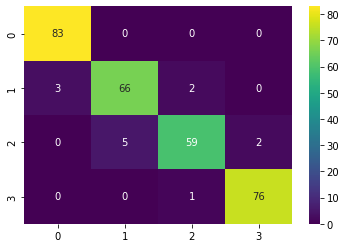

In [112]:
# Confusion Matrix 
cnfm = confusion_matrix(y_true=y_test, y_pred=y_pred)
sns.heatmap(cnfm, annot=True, cmap="viridis");

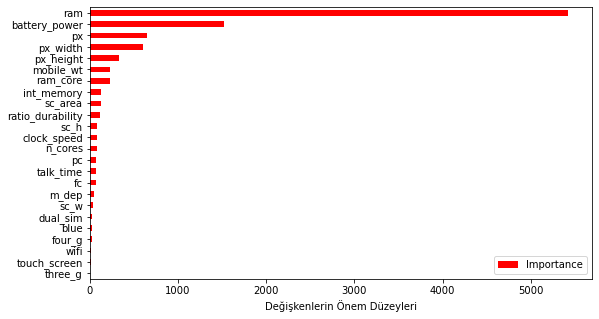

In [114]:
Importance = pd.DataFrame({"Importance": cat.feature_importances_*100},
                         index = df_o.drop(["price_range"], axis = 1).columns)

Importance.sort_values(by = "Importance", axis = 0, ascending = True).plot(kind= "barh",
                                                                          color = "r", figsize=(9,5))
plt.xlabel("Değişkenlerin Önem Düzeyleri")
plt.legend(loc='lower right');

In [116]:
df_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [129]:
df_test_1 = df_test.drop(["id"], axis = 1)
df_test_1.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [132]:
df_test_1["ratio_durability"] = df_test_1["battery_power"] / df_test_1["talk_time"]
df_test_1["px"] = df_test_1["px_height"] * df_test_1["px_width"]
df_test_1["ram_core"] = df_test_1["ram"] * df_test_1["n_cores"]
df_test_1["sc_area"] = df_test_1["sc_h"] * df_test_1["sc_w"]

In [133]:
test_pred = cat.predict(df_test_1).reshape(-1,)
test_pred[:10]

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0], dtype=int64)

In [135]:
submission = pd.DataFrame({'id':df_test['id'],'price_range':test_pred})
submission.head(10)

,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1
5,6,3
6,7,3
7,8,1
8,9,3
9,10,0


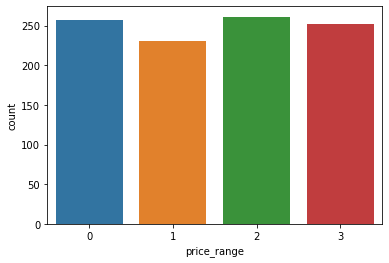

In [137]:
sns.countplot(x = 'price_range', data = submission)
plt.show()